In [1]:
from ligeor import Polyfit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_initialize_filename(filename, data):
    model = Polyfit(filename=filename, n_downsample=1, delimiter=',')
    assert(((model.phases == data[:,0]) & (model.fluxes == data[:,1]) & (model.sigmas == data[:,2])).all())

    
def test_initialize_data(data):
    model = Polyfit(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    assert(((model.phases == data[:,0]) & (model.fluxes == data[:,1]) & (model.sigmas == data[:,2])).all())
    return model


def test_fit(model, result):
    model.fit()
    model.plot()
    return model
    
    
def test_compute_ecl_params(model, result):
    eb_dict = model.compute_eclipse_params()
    for key in eb_dict.keys():
        if key in result.keys():
            assert(np.abs(eb_dict[key] - result[key]) < 1e-4)
        else:
            assert(np.isnan(eb_dict[key]))

In [3]:
C = 1.
mu1 = 0.
sigma1 = 0.015
d1 = 0.5
mu2 = 0.42
sigma2 = 0.01
d2 = 0.35
Aell = 0.05
phi01 = 0.
phi02 = 0.42

In [4]:
data_c = np.loadtxt('../data/const.csv', delimiter=',')
data_cg = np.loadtxt('../data/cg.csv', delimiter=',')
data_ce = np.loadtxt('../data/ce.csv', delimiter=',')
data_cge = np.loadtxt('../data/cge.csv', delimiter=',')
data_cg12 = np.loadtxt('../data/cg12.csv', delimiter=',')
data_cg12e1 = np.loadtxt('../data/cg12e1.csv', delimiter=',')
data_cg12e2 = np.loadtxt('../data/cg12e2.csv', delimiter=',')

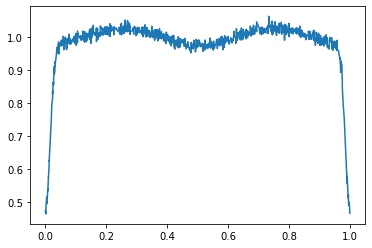

In [27]:
data_cge[:,0][data_cge[:,0] < 0] = data_cge[:,0][data_cge[:,0] < 0] + 1
s=np.argsort(data_cge[:,0])
data_cge = data_cge[s]
plt.plot(data_cge[:,0], data_cge[:,1])

In [28]:
model_c = test_initialize_data(data_c)
model_cg = test_initialize_data(data_cg)
model_ce = test_initialize_data(data_ce)
model_cge = test_initialize_data(data_cge)
model_cg12 = test_initialize_data(data_cg12)
model_cg12e1 = test_initialize_data(data_cg12e1)
model_cg12e2 = test_initialize_data(data_cg12e2)

In [6]:
data_cg[:,0].max()

0.49944888165325607

In [7]:
model_cg12e1.fit()

(array([-0.02974963,  0.02855334,  0.40102922,  0.43806536]),
 ((532.3879476323455, 0.3813784121861318, 0.5047446896620369),
  (-1.5977141445754617, 0.786220883133249, 0.9285400889053927),
  (875.2327735752747, -735.5757596876666, 155.21544286233973),
  (-0.9107021746485107, 1.3222588600854048, 0.538983608392698)),
 array([-3.58177166e-04,  2.46045541e-01,  4.20217216e-01,  7.25955695e-01]))

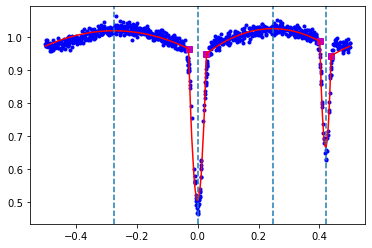

In [8]:
model_cg12e1.plot(model_cge.phases)

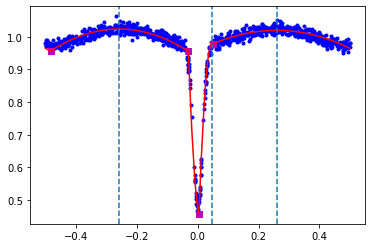

In [30]:
model_cge.fit()
model_cge.plot(model_cge.phases)

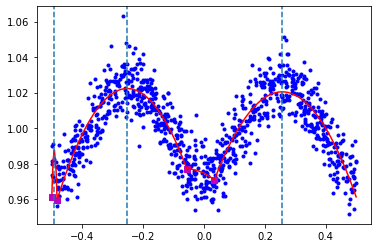

In [20]:
model_ce.fit()
model_ce.plot(model_ce.phases)